# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data?resource=download

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
#importing all the libraries necessary for EDA and data visualization later down the road
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("goodreads_data.csv")

In [2]:

df['Description'] = df['Description'].astype(str)

In [3]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  10000 non-null  object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [5]:
#print the columns
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [6]:
#rename the 'Unnamed' column
df = df.rename(columns={'Unnamed: 0':'ID'})

In [7]:
df.columns

Index(['ID', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [8]:
# check the size of df
df.shape

(10000, 8)

In [9]:
# check for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 8)


In [10]:
# what's the avg rating of the data set?
df["Avg_Rating"].describe()

count    10000.000000
mean         4.068577
std          0.335359
min          0.000000
25%          3.880000
50%          4.080000
75%          4.260000
max          5.000000
Name: Avg_Rating, dtype: float64

In [11]:
#which book has the highest rating?
top_books = (df[df.Avg_Rating == df.Avg_Rating.max()])

In [12]:
# how many?
top_books.shape

(120, 8)

In [13]:
top_books.head()

,ID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
3737,3737,Joey Wheeler: The Official Character & Monster...,"Arthur ""Sam"" Murakami","""Check out this official character and monster...",[],5.0,2,https://www.goodreads.com/book/show/2114514.Jo...
4603,4603,"This Land of Streams: Spiritual, Friendship, R...",Maria Johnsen,You will find within this book Maria Johnsen's...,[],5.0,11,https://www.goodreads.com/book/show/20773953-t...
4824,4824,"Ama Dios (4 AoL Consciousness Books Combined, ...",Nataša Pantović,"Ama Dios, 4 AoL Consciousness Books Combined.A...","['Philosophy', 'Spirituality', 'Adult']",5.0,6,https://www.goodreads.com/book/show/44015366-a...
5809,5809,The Secrets of Albion Falls (The Secrets Serie...,Sass Cadeaux,Living a sequestered life in magical village n...,[],5.0,23,https://www.goodreads.com/book/show/17310646-t...
5843,5843,Eclavarda Rising,Stephen Christiansen,nan,[],5.0,2,https://www.goodreads.com/book/show/23353186-e...


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [14]:
# get top 10 most common genres
genre_count = df['Genres'].value_counts().head(10)
genre_count

[]                                                                                            960
['Fiction']                                                                                    49
['Fantasy']                                                                                    42
['Nonfiction']                                                                                 24
['Romance']                                                                                    20
['Poetry']                                                                                     18
['Horror']                                                                                     15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']          11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']     11
['Self Help']                                                                                   9
Name: Genres, dtype:

The above output reveals that there was missing a significant amount of missing data in the Genres column. I will address this in the next checkpoint when I clean the data.

# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. 

In [15]:
# run a sample to check for any data problems
df.sample(10)

,ID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
4571,4571,Weird Girl and What's His Name,Meagan Brothers,"In the tiny podunk town of Hawthorne, North Ca...","['Young Adult', 'LGBT', 'Contemporary', 'Ficti...",3.50,978,https://www.goodreads.com/book/show/24694256-w...
7672,7672,Billy Summers,Stephen King,Billy Summers is a man in a room with a gun. H...,"['Fiction', 'Thriller', 'Horror', 'Mystery', '...",4.22,"126,995",https://www.goodreads.com/book/show/56852407-b...
2262,2262,Drive: The Surprising Truth About What Motivat...,Daniel H. Pink,The New York Times bestseller that gives reade...,"['Nonfiction', 'Business', 'Psychology', 'Lead...",3.95,"113,890",https://www.goodreads.com/book/show/6452796-drive
9558,9558,Seven Locks,Christine Wade,"The Hudson River Valley, 1769: A man mysteriou...","['Historical Fiction', 'Fiction', '18th Centur...",3.33,276,https://www.goodreads.com/book/show/13547514-s...
3660,3660,"Kingdom of Ash (Throne of Glass, #7)",Sarah J. Maas,Aelin Galathynius has vowed to save her people...,"['Fantasy', 'Young Adult', 'Romance', 'New Adu...",4.64,"318,076",https://www.goodreads.com/book/show/33590260-k...
9337,9337,A God of Many Understandings?: The Gospel and ...,Todd Miles,Western Christianity’s interaction with world ...,"['Theology', 'Christian']",4.22,49,https://www.goodreads.com/book/show/7562559-a-...
6936,6936,"Stars Above (The Lunar Chronicles, #4.5)",Marissa Meyer,The universe of the Lunar Chronicles holds sto...,"['Fantasy', 'Young Adult', 'Science Fiction', ...",4.17,"86,893",https://www.goodreads.com/book/show/25689074-s...
7064,7064,The Brugan,Stephen Moore,Sarah Lemming feels lost. She’s twelve years o...,[],5.00,7,https://www.goodreads.com/book/show/21901693-t...
7358,7358,"We'll Always Have Summer (Summer, #3)",Jenny Han,It's been two years since Conrad told Belly to...,"['Romance', 'Young Adult', 'Contemporary', 'Fi...",3.88,"287,117",https://www.goodreads.com/book/show/8680278-we...
1997,1997,The Sandman Vol. 1: Preludes & Nocturnes,Neil Gaiman,\r\nLibrarian Note: If you're looking for the ...,"['Graphic Novels', 'Comics', 'Fantasy', 'Ficti...",4.25,"256,363",https://www.goodreads.com/book/show/23754.The_...


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [16]:
# know that the Genre column needs some cleaning:
genre_count = df['Genres'].value_counts().head(10)
genre_count

[]                                                                                            960
['Fiction']                                                                                    49
['Fantasy']                                                                                    42
['Nonfiction']                                                                                 24
['Romance']                                                                                    20
['Poetry']                                                                                     18
['Horror']                                                                                     15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']          11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']     11
['Self Help']                                                                                   9
Name: Genres, dtype:

In [17]:
# replace null value '[]' with NaN
df['Genres']=df["Genres"].replace('[]',np.NaN)

In [18]:
# see if that worked
genre_count = df['Genres'].value_counts().head(10)
genre_count

['Fiction']                                                                                   49
['Fantasy']                                                                                   42
['Nonfiction']                                                                                24
['Romance']                                                                                   20
['Poetry']                                                                                    18
['Horror']                                                                                    15
['Thriller', 'Fiction', 'Mystery', 'Crime', 'Action', 'Suspense', 'Mystery Thriller']         11
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']    11
['Self Help']                                                                                  9
['Young Adult']                                                                                9
Name: Genres, dtype: int64

<Axes: >

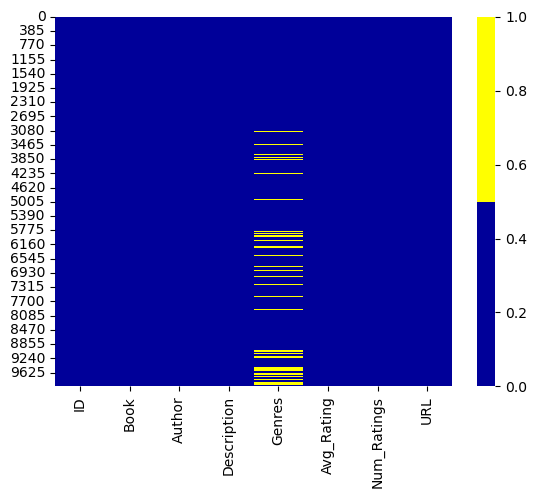

In [19]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colors = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [20]:
# Try out a missing data percentage list! 
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Book - 0%
Author - 0%
Description - 0%
Genres - 10%
Avg_Rating - 0%
Num_Ratings - 0%
URL - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

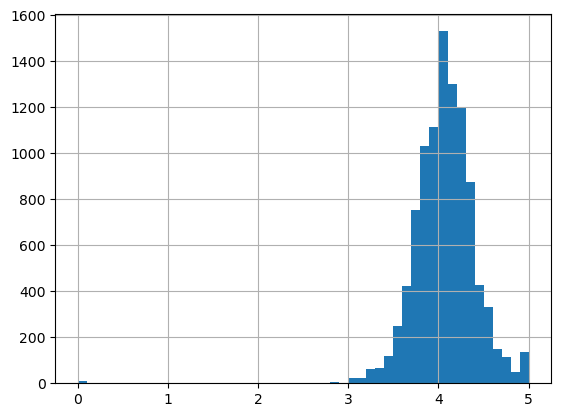

In [21]:
# Plot a histogram to see if there are any outliers.
df["Avg_Rating"].hist(bins=50)

In [22]:
# Use the describe() method
df["Avg_Rating"].describe()

count    10000.000000
mean         4.068577
std          0.335359
min          0.000000
25%          3.880000
50%          4.080000
75%          4.260000
max          5.000000
Name: Avg_Rating, dtype: float64

This means there is a book with a 0 score on average rating, which appears to be an outlier. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [23]:
# check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 8)


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [24]:
df['Genres'].sample(10)

3274    ['Nonfiction', 'Self Help', 'Business', 'Produ...
4504    ['Romance', 'Young Adult', 'Contemporary', 'Ne...
3050    ['Chick Lit', 'Romance', 'Fiction', 'Fantasy',...
2088    ['Nonfiction', 'History', 'Plays', 'Audiobook'...
9890    ['Childrens', 'Picture Books', 'Fantasy', 'Cla...
4075    ['Urban Fantasy', 'Fantasy', 'Paranormal', 'Va...
3862    ['Science Fiction', 'Thriller', 'Fiction', 'Ho...
181     ['Fiction', 'Classics', 'Contemporary', 'Thril...
8267                    ['Historical Fiction', 'Fiction']
8070    ['Fantasy', 'Young Adult', 'Retellings', 'Roma...
Name: Genres, dtype: object

In [25]:
# make a new dataframe for data manipulation with ID, genres, avg rating, num of ratings, book, description, author
df1 = df[['ID','Genres','Avg_Rating','Num_Ratings','Book','Author','Description']].copy()
df1.head()

,ID,Genres,Avg_Rating,Num_Ratings,Book,Author,Description
0,0,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
1,1,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...
2,2,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and..."
3,3,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...
4,4,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...


In [26]:
df1['Genres'] = df1['Genres'].str.split(',')

In [27]:
df1 = df1.explode('Genres')
df1

,ID,Genres,Avg_Rating,Num_Ratings,Book,Author,Description
0,0,['Classics',4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,'Fiction',4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,'Historical Fiction',4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,'School',4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,'Literature',4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
...,...,...,...,...,...,...,...
9998,9998,['New Adult',4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,'Romance',4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,'Contemporary Romance',4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,'Contemporary'],4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...


In [28]:
# clean the column to remove unnecessary punctuation
df1['Genres']=df1['Genres'].str.replace('[','')
df1['Genres']=df1['Genres'].str.replace(']','')
df1['Genres']=df1['Genres'].str.replace("'",'')
df1['Genres']=df1['Genres'].str.replace("'",'')
df1['Genres']=df1['Genres'].str.strip()
# check to make sure that worked
df1

C:\Users\johan\AppData\Local\Temp\ipykernel_3916\2532118343.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Genres']=df1['Genres'].str.replace('[','')
C:\Users\johan\AppData\Local\Temp\ipykernel_3916\2532118343.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Genres']=df1['Genres'].str.replace(']','')


,ID,Genres,Avg_Rating,Num_Ratings,Book,Author,Description
0,0,Classics,4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,Fiction,4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,Historical Fiction,4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,School,4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
0,0,Literature,4.27,"5,691,311",To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...
...,...,...,...,...,...,...,...
9998,9998,New Adult,4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,Romance,4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,Contemporary Romance,4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...
9998,9998,Contemporary,4.13,263,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...


In [29]:
# check how much Genres data is missing
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Genres - 2%
Avg_Rating - 0%
Num_Ratings - 0%
Book - 0%
Author - 0%
Description - 0%


In [30]:
# now we can remove missing data
df1.dropna(subset=['Genres'], inplace=True)

In [31]:
# check shape
df1.shape

(57963, 7)

In [32]:
# select subsection of df1 where avg_rating is greater than or equal to 4.3 (this is what the publishing company is looking for)
df2 = df1[(df1['Avg_Rating'] >= 4.3)]

In [33]:
df2.shape

(8602, 7)

In [34]:
df2["Num_Ratings"] = df2["Num_Ratings"].str.replace(',','')
df2["Num_Ratings"] = df2["Num_Ratings"].astype(int)

C:\Users\johan\AppData\Local\Temp\ipykernel_3916\3108735582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Num_Ratings"] = df2["Num_Ratings"].str.replace(',','')
C:\Users\johan\AppData\Local\Temp\ipykernel_3916\3108735582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Num_Ratings"] = df2["Num_Ratings"].astype(int)


In [35]:
# select where num_ratings is greater than 100 (i.e., statistically significant)
df3 = df2[(df2['Num_Ratings'] >= 100)]

In [36]:
df3.shape

(7911, 7)

In [37]:
# display top 25 most common genres
df3_top25 = df3['Genres'].value_counts().head(25)
df3_top25

Fiction               719
Nonfiction            375
Fantasy               370
Classics              265
Young Adult           206
Romance               203
Historical Fiction    193
Audiobook             180
History               175
Contemporary          164
Historical            144
Novels                140
Biography             130
Adventure             128
Childrens             118
Literature            102
Adult                 102
Religion              101
Memoir                 97
Philosophy             96
War                    84
Science Fiction        82
Mystery                82
Drama                  81
Politics               80
Name: Genres, dtype: int64

In [38]:
# make the above a dataframe for plotting
df3_top25 = pd.DataFrame(df3_top25)
# rename column displaying value counts from Genres to Count
df3_top25 = df3_top25.rename(columns={'Genres': 'Count'})
# set the index displaying genre names as a column to be accessed in plot
df3_top25['Genres']=df3_top25.index
df3_top25

,Count,Genres
Fiction,719,Fiction
Nonfiction,375,Nonfiction
Fantasy,370,Fantasy
Classics,265,Classics
Young Adult,206,Young Adult
Romance,203,Romance
Historical Fiction,193,Historical Fiction
Audiobook,180,Audiobook
History,175,History
Contemporary,164,Contemporary


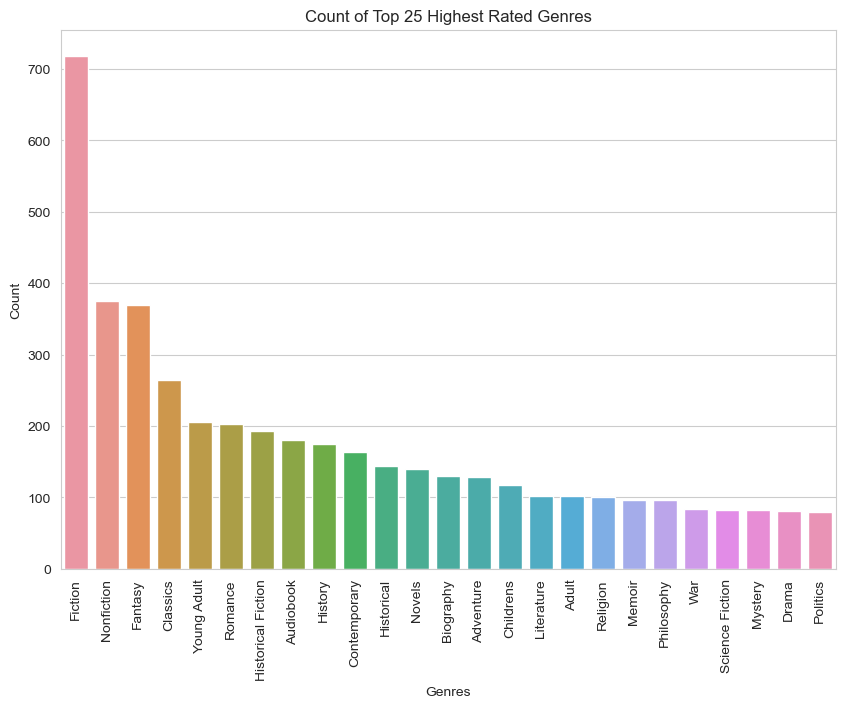

In [39]:
# plot this
fig = plt.figure(figsize =(10, 7))
sns.set_style("whitegrid")
sns.barplot(x='Genres', y='Count', data=df3_top25).set(title="Count of Top 25 Highest Rated Genres")
plt.xticks(rotation=90)
plt.show()

In [40]:
# make group of top authors in this dataset
top_authors = df3.groupby('Author').size().sort_values(ascending=False).head(16)
top_authors

Author
Anonymous             110
Rick Riordan          105
Cassandra Clare        70
George R.R. Martin     63
Sarah J. Maas          63
Kirsten Fullmer        60
Stephen King           56
Brandon Sanderson      56
J.K. Rowling           56
Misba                  52
James Herriot          51
Jim Butcher            49
Suzanne Collins        49
J.R.R. Tolkien         49
Terry Pratchett        49
Richelle Mead          49
dtype: int64

In [41]:
# anonymous doesn't do anything for us, so let's drop
top_authors = top_authors.iloc[1:16]
top_authors

Author
Rick Riordan          105
Cassandra Clare        70
George R.R. Martin     63
Sarah J. Maas          63
Kirsten Fullmer        60
Stephen King           56
Brandon Sanderson      56
J.K. Rowling           56
Misba                  52
James Herriot          51
Jim Butcher            49
Suzanne Collins        49
J.R.R. Tolkien         49
Terry Pratchett        49
Richelle Mead          49
dtype: int64

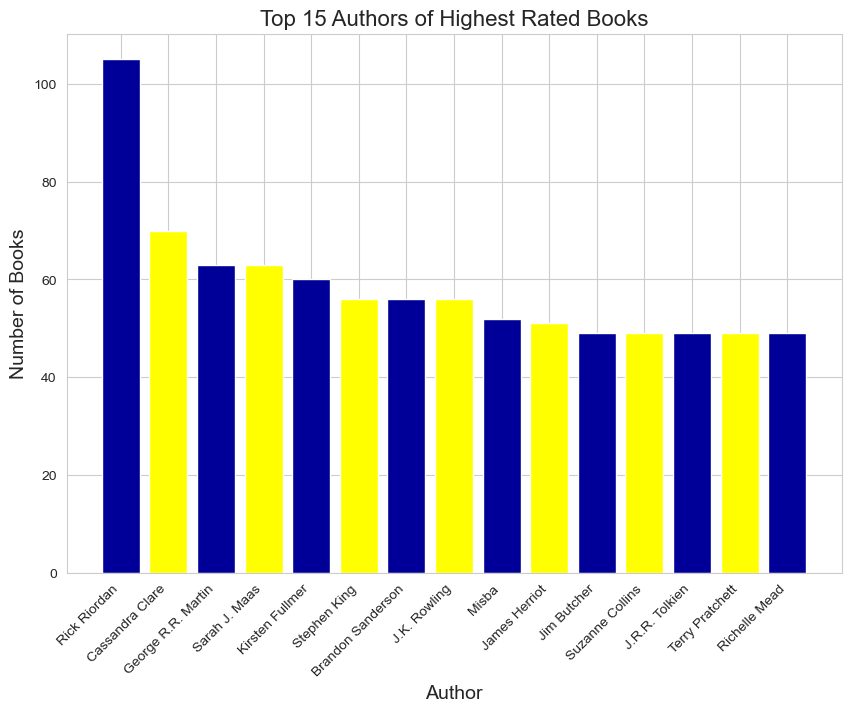

In [42]:
# create a bar chart of the most frequent 15 authors from the cleaned dataframe
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(top_authors.index, top_authors.values, color=colors)

ax.set_title('Top 15 Authors of Highest Rated Books', fontsize=16)
ax.set_xlabel('Author', fontsize=14)
ax.set_ylabel('Number of Books', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

# Going further: NLP analysis

Practicing NLP skills with the dataset

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from  PIL import Image
import string
import nltk
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

In [44]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pil is already up-to-date!
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\

[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |    

True

In [45]:
text = " ".join(describe for describe in df3.Description).lower()
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 7710166 words in the combination of all descriptions.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


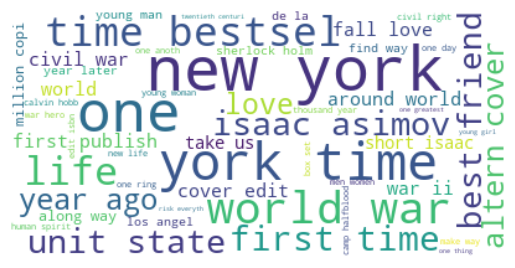

In [46]:
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stopwords = set(stopwords.words('english'))
stopwords.update(["book", "books", "author", "u", "s", "story", "stories", "read", "reading"])

# Preprocess text
text = text.translate(str.maketrans('', '', string.punctuation))
words = text.split()
words = [word for word in words if word not in stopwords]
words = [stemmer.stem(word) for word in words]

# Generate word cloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()